In [25]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

In [26]:
df = pd.read_csv('../datasets/salaries.csv')

In [27]:
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [28]:
df.shape

(16, 4)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   company                16 non-null     object
 1   job                    16 non-null     object
 2   degree                 16 non-null     object
 3   salary_more_then_100k  16 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 640.0+ bytes


In [30]:
object_features = df.select_dtypes('O').columns

for i in object_features:
    df[i] = LabelEncoder().fit_transform(df[i])

In [31]:
df.head()

,company,job,degree,salary_more_then_100k
0,2,2,0,0
1,2,2,1,0
2,2,0,0,1
3,2,0,1,1
4,2,1,0,0


In [32]:
X = df.drop('salary_more_then_100k',axis='columns')
y = target = df['salary_more_then_100k']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [40]:
model = DecisionTreeClassifier().fit(X_train, y_train)

In [41]:
model.score(X_test, y_test)

0.5

In [42]:
pred = model.predict(X_test)

In [43]:
cm = confusion_matrix(y_test, pred)

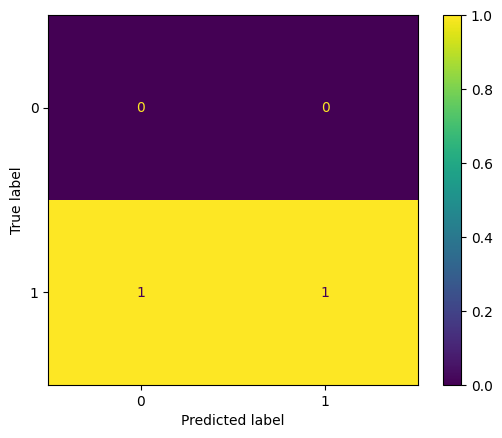

In [44]:
ConfusionMatrixDisplay(cm).plot()